In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('apartments_train.csv')
len(df)

31932

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31932 entries, 0 to 31931
Data columns (total 24 columns):
address         26863 non-null object
area            0 non-null float64
balcony         31932 non-null bool
cellar          0 non-null float64
city            31932 non-null object
contact_name    25134 non-null object
district        31932 non-null object
extra_costs     31932 non-null float64
garden          31932 non-null bool
immo_id         31932 non-null int64
kitchen         31932 non-null bool
lat             26740 non-null float64
lng             26740 non-null float64
media_count     31932 non-null int64
private         31932 non-null bool
rent            31932 non-null float64
rooms           31932 non-null float64
sqm             31932 non-null float64
time_dest       0 non-null float64
time_dest2      0 non-null float64
time_dest3      0 non-null float64
title           31932 non-null object
url             31932 non-null object
zip_code        31932 non-null int64

In [5]:
df.head()

,address,area,balcony,cellar,city,contact_name,district,extra_costs,garden,immo_id,...,private,rent,rooms,sqm,time_dest,time_dest2,time_dest3,title,url,zip_code
0,Holteistraße 17,NaN,True,NaN,Berlin,Felix Henne,Friedrichshain (Friedrichshain),360.0,False,104509324,...,False,1095.00,3.0,82.52,NaN,NaN,NaN,Wohnen am Stadtpark,https://www.immobilienscout24.de/expose/104509324,10245
1,Kremmener Straße 11,NaN,True,NaN,Berlin,Ihr Makler in Berlin!,Mitte (Mitte),282.0,False,102537923,...,False,1824.00,3.0,102.48,NaN,NaN,NaN,Außergewöhnliches Industrieloft mit 2 edlen Bä...,https://www.immobilienscout24.de/expose/102537923,10435
2,Rudolf-Schwarz-Str. 26,NaN,False,NaN,Berlin,NaN,Prenzlauer Berg (Prenzlauer Berg),137.0,False,106461482,...,False,655.00,2.0,54.56,NaN,NaN,NaN,Gemütliche 2 Zimmer Wohnung in Prenzlauer Berg...,https://www.immobilienscout24.de/expose/106461482,10407
3,NaN,NaN,True,NaN,Berlin,Michael Latteck,Wilmersdorf (Wilmersdorf),122.0,False,106325874,...,False,899.85,2.0,59.99,NaN,NaN,NaN,attraktive Pärchen-Wohnung am Güntzel-Kiez! Pa...,https://www.immobilienscout24.de/expose/106325874,10717
4,Bredowstr. 5,NaN,False,NaN,Berlin,Vermietungsteam Stadthaus Verwaltungsgesellschaft,Tiergarten (Tiergarten),97.0,False,106316967,...,False,482.00,1.0,37.59,NaN,NaN,NaN,Moabit! - Westfälisches Viertel! - 1 Zimmer - ...,https://www.immobilienscout24.de/expose/106316967,10551


## Data Cleaning

In [6]:
df.immo_id = df.immo_id.astype(str)
df.zip_code = df.zip_code.astype(str)
df2=df.drop(columns=["time_dest", "time_dest2", "time_dest3", "area", "cellar"])
df2.describe()

,area,cellar,extra_costs,lat,lng,media_count,rent,rooms,sqm
count,0.0,0.0,31932.000000,26740.000000,26740.000000,31932.000000,31932.000000,31932.000000,31932.000000
mean,NaN,NaN,221.975585,52.508081,13.396624,10.970468,979.486026,2.490923,78.363778
std,NaN,NaN,1396.253013,0.045758,0.098108,6.313705,6761.499857,1.220792,44.324234
min,NaN,NaN,0.000000,52.373770,13.116530,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,130.000000,52.479450,13.330520,7.000000,520.000000,2.000000,53.760000
50%,NaN,NaN,180.000000,52.510890,13.395005,10.000000,719.000000,2.000000,68.900000
75%,NaN,NaN,250.000000,52.537560,13.452780,14.000000,1098.000000,3.000000,92.142500
max,NaN,NaN,208597.090000,52.656390,13.726850,77.000000,1000000.000000,100.000000,2489.660000


## Interesting statistics
### Providers with most apartment offers

In [7]:
df2.groupby("contact_name").size().sort_values(ascending=False)

contact_name
Vermietungsteam Stadthaus Verwaltungsgesellschaft            948
Britta C. Gruttmann                                          417
Ingo Pries                                                   393
Petra Hubertus                                               348
Manuel Lan                                                   298
Melanie Schröder                                             283
Sandra Smarslik                                              281
Thomas Voss                                                  267
Schönlife Immobilien                                         265
Kathrin Aschurow                                             253
Ihr Makler in Berlin!                                        252
Alexandra Nepomnyashcha                                      223
Sandra Linke                                                 213
Beate Akitoye                                                198
Hans-Jürgen  Kloss                                           194
Pia Unterlau

### Districts with most apartment offers

In [8]:
df2.groupby("district").size().sort_values(ascending=False)

district
Mitte (Mitte)                              2535
Charlottenburg (Charlottenburg)            2401
Prenzlauer Berg (Prenzlauer Berg)          1982
Friedrichshain (Friedrichshain)            1825
Neukölln (Neukölln)                        1615
Wedding (Wedding)                          1543
Tiergarten (Tiergarten)                    1524
Wilmersdorf (Wilmersdorf)                  1425
Kreuzberg (Kreuzberg)                      1133
Spandau (Spandau)                          1088
Schöneberg (Schöneberg)                     998
Köpenick (Köpenick)                         764
Lichterfelde (Steglitz)                     679
Weißensee (Weißensee)                       658
Reinickendorf (Reinickendorf)               626
Steglitz (Steglitz)                         590
Pankow (Pankow)                             589
Adlershof (Treptow)                         518
Marzahn (Marzahn)                           450
Niederschönhausen (Pankow)                  409
Hellersdorf (Hellersdorf)      

In [15]:
df3=df2[(df2.rent<2000) & (df2.sqm<200) & (df2.rooms < 10) & (df2.extra_costs < 2000)]
len(df3)

30011

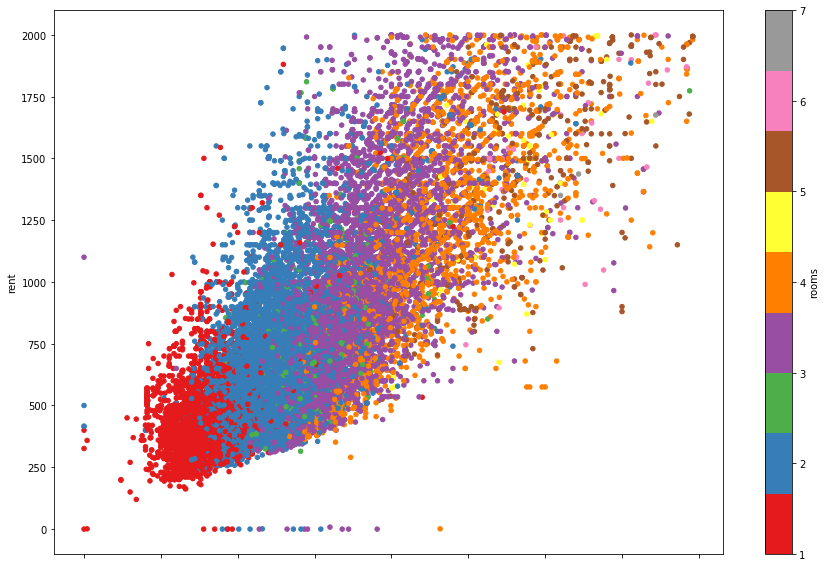

In [16]:
df3.plot(x="sqm", y="rent", c="rooms", kind="scatter", colormap=cm.Set1, figsize=(15,10))

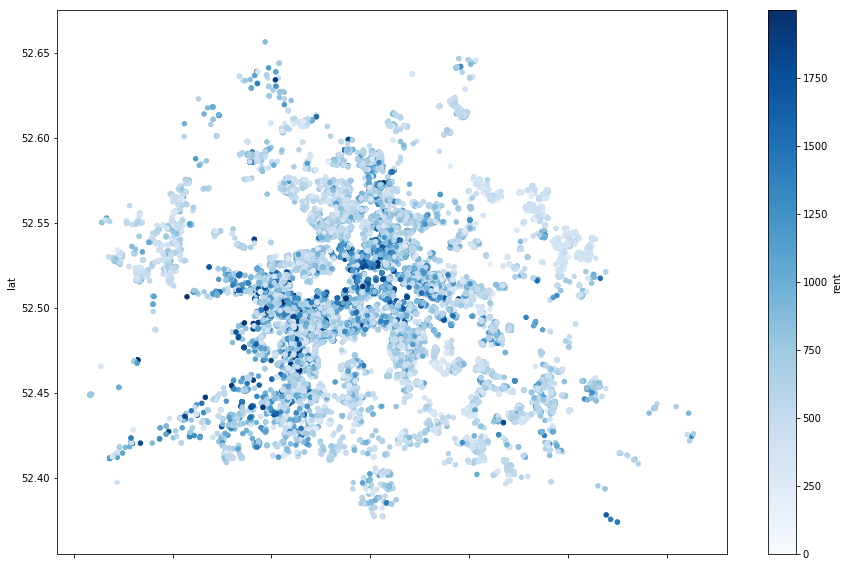

In [17]:
df3.plot(x="lng", y="lat", c="rent", kind="scatter", figsize=(15,10), colormap=cm.Blues)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121451f98>,
      dtype=object)

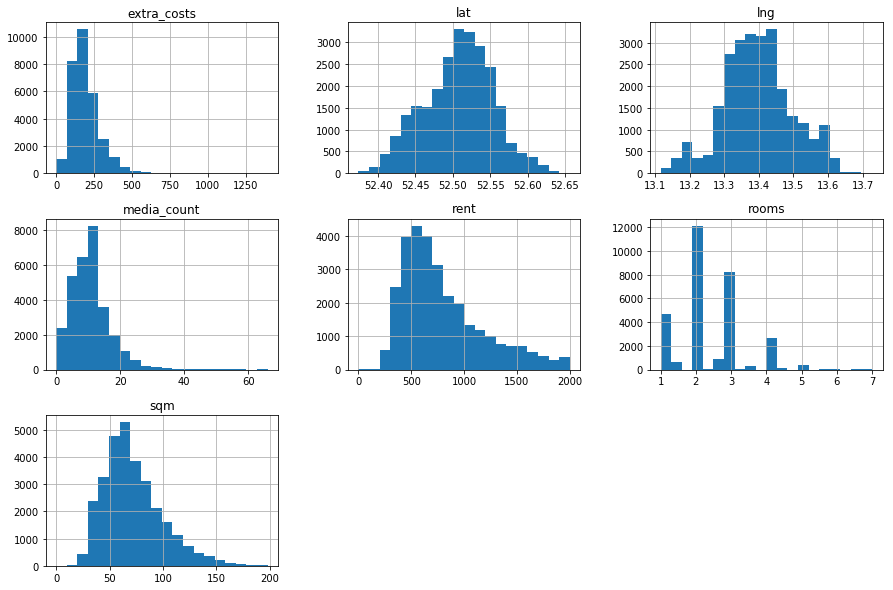

In [18]:
df3.hist(bins=20,figsize=(15,10), column=["extra_costs","lat","lng","media_count","rent","rooms","sqm"])

In [19]:
corr=df3.corr()

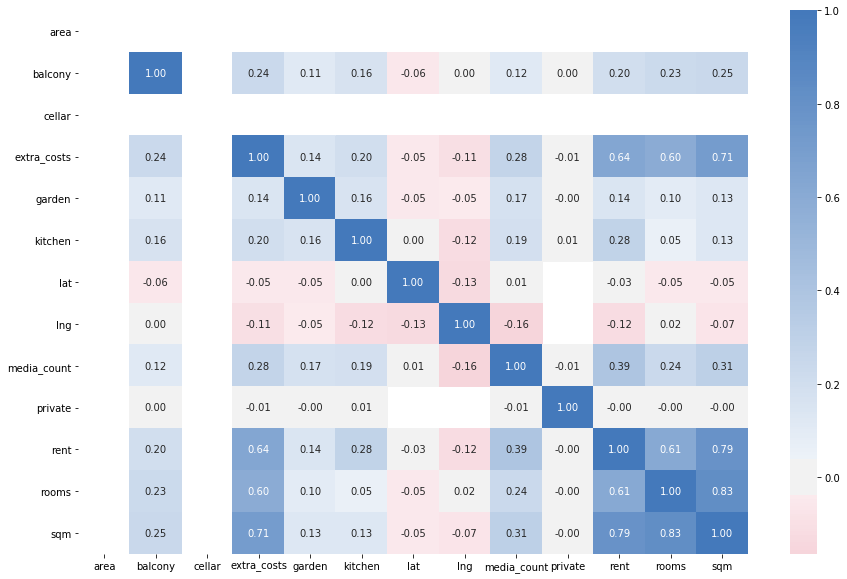

In [20]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, center=0.0, 
            cmap=sns.diverging_palette(5, 250, as_cmap=True), annot=True, fmt=".2f", ax=ax)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


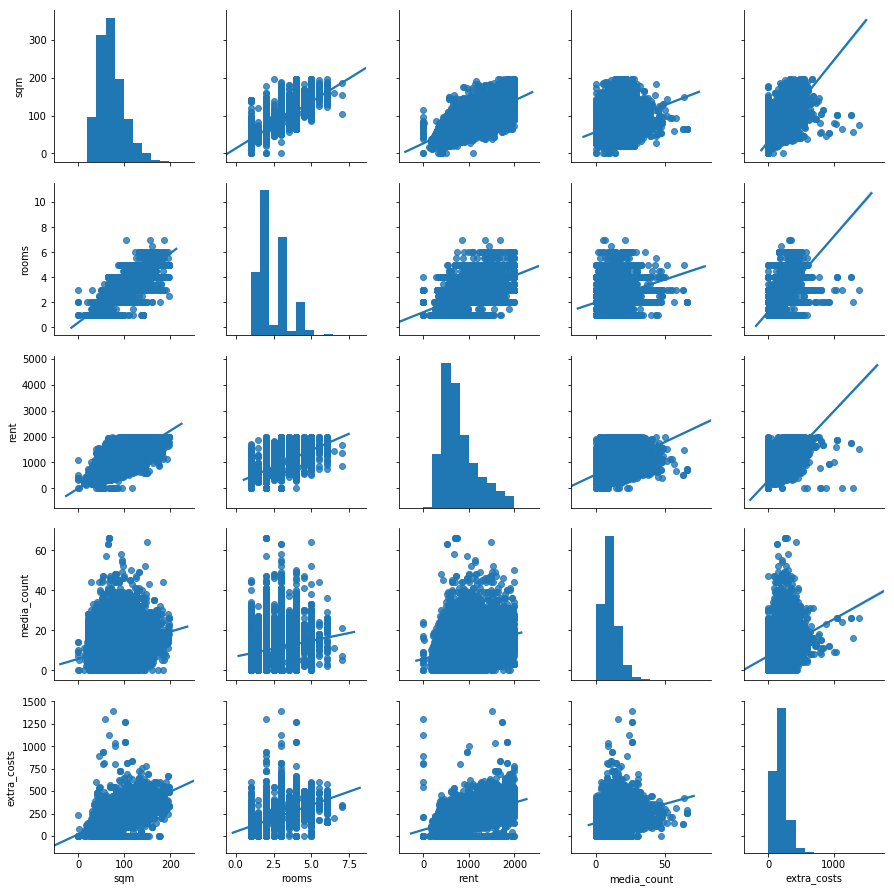

In [22]:
# df4=df3.dropna()
sns.pairplot(df3, vars=["sqm","rooms","rent","media_count", "extra_costs"], kind="reg")

In [25]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

In [26]:
# One-hot encoding of zip_codes
hot_zip = pd.get_dummies(df3.zip_code)
df3.balcony = df3.balcony.astype(int)
df3.garden = df3.garden.astype(int)
df3.kitchen = df3.kitchen.astype(int)
df3.private = df3.private.astype(int)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
X = pd.concat((df3[["sqm","rooms","balcony","garden","kitchen","private"]], hot_zip), axis=1)
y = df3[["rent"]]

In [28]:
X.head()

,sqm,rooms,balcony,garden,kitchen,private,10059,10115,10117,10119,...,14167,14169,14179,14193,14195,14197,14199,14974,19719,20147
0,82.52,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,102.48,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,54.56,2.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,59.99,2.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.59,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# a simple linear model doesn't perform too well
simple = linear_model.LinearRegression()
simple.fit(X,y)
y_pred = simple.predict(X)
r2_score(y, y_pred)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.805445021495854

In [30]:
# Robustly fit linear model with RANSAC (RANdom SAmple Consensus) algorithm 
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [31]:
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [55]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% der Wohnungen als Ausreißer identifiziert' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

24.0% der Wohnungen als Ausreißer identifiziert


In [56]:
y_pred = regressor.predict(X)
df3["rent_predicted"] = y_pred

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


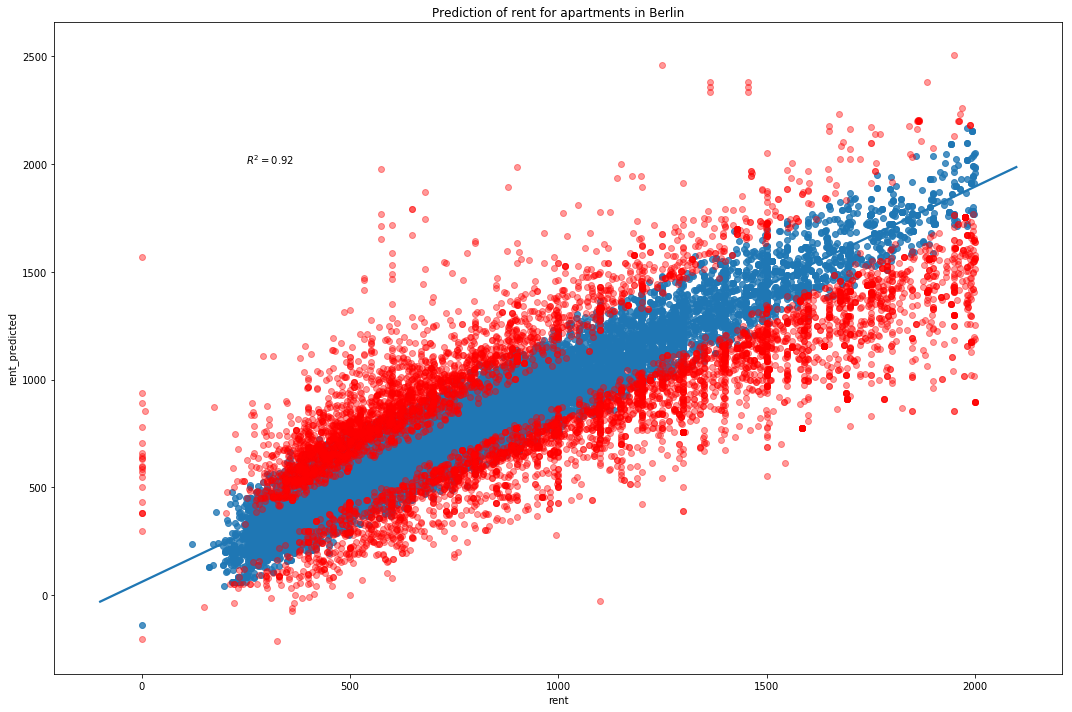

In [60]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.regplot(df3['rent'][inlier_mask],
            df3['rent_predicted'][inlier_mask])
plt.scatter(df3['rent'][outlier_mask],
            df3['rent_predicted'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title('Prediction of rent for apartments in Berlin')
plt.text(250, 2000, r'$R^2=%.2f$' % r2_ransac)
plt.tight_layout()
# plt.savefig('LinReg-rent-apartment.png', dpi=150)

In [61]:
df_test = pd.read_csv('apartments_test.csv')
len(df_test)

3309

In [62]:
df2_test=df_test.drop(columns=["time_dest", "time_dest2", "time_dest3"])
df2_test.describe()

,area,cellar,extra_costs,immo_id,lat,lng,media_count,rent,rooms,sqm,zip_code
count,0.0,0.0,3309.000000,3.309000e+03,2721.000000,2721.000000,3309.000000,3309.000000,3309.000000,3309.000000,3309.000000
mean,NaN,NaN,229.113629,1.026711e+08,52.508286,13.393502,11.624962,1139.576745,2.577999,82.808250,11876.211242
std,NaN,NaN,145.021002,9.777422e+06,0.045547,0.104382,7.639504,888.289082,1.153846,46.044379,1426.281945
min,NaN,NaN,0.000000,3.018110e+07,52.376040,13.127430,0.000000,176.520000,1.000000,6.000000,10115.000000
25%,NaN,NaN,140.390000,1.047457e+08,52.478960,13.326820,7.000000,602.620000,2.000000,55.000000,10553.000000
50%,NaN,NaN,200.000000,1.060304e+08,52.510380,13.390170,10.000000,900.000000,2.000000,72.550000,12159.000000
75%,NaN,NaN,280.000000,1.064149e+08,52.537790,13.452820,15.000000,1400.000000,3.000000,99.810000,13125.000000
max,NaN,NaN,1750.000000,1.066237e+08,52.645320,13.667430,88.000000,15000.000000,11.000000,482.000000,37127.000000


In [63]:
df3_test=df2_test[(df2_test.rent<2000) & (df2_test.sqm<200) & (df2_test.rooms < 10) & (df2_test.extra_costs < 2000)]
len(df3_test)

2993

In [64]:
hot_zip_test = pd.get_dummies(df3_test.zip_code)
df3_test.balcony = df3_test.balcony.astype(int)
df3_test.garden = df3_test.garden.astype(int)
df3_test.kitchen = df3_test.kitchen.astype(int)
df3_test.private = df3_test.private.astype(int)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [65]:
X_test = pd.concat((df3_test[["sqm","rooms","balcony","garden","kitchen","private"]], hot_zip_test), axis=1)
y_test = df3_test[["rent"]]
X_test.head()

,sqm,rooms,balcony,garden,kitchen,private,10115,10117,10119,10178,...,14129,14163,14165,14167,14169,14193,14195,14197,14199,37127
0,83.00,2.5,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.00,4.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.00,2.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53.68,2.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,103.05,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data

# Get missing columns in the training test
missing_cols = set( X.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X.columns]

In [67]:
y_pred = regressor.predict(X_test)
df3_test["rent_predicted"] = y_pred

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
r2_score(y_test, y_pred)

0.3845097842000519

In [70]:
df3_test["rent_error"] = df3_test["rent"] - df3_test["rent_predicted"]

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
top = df3_test.sort_values("rent_error")

In [72]:
top[top["district"].str.contains("Zehlendorf")]

,address,area,balcony,cellar,city,contact_name,district,extra_costs,garden,immo_id,...,media_count,private,rent,rooms,sqm,title,url,zip_code,rent_predicted,rent_error
3169,Von-der-Trenck-Straße 5 A,NaN,1,NaN,Berlin,Wohnbau Service Bonn GmbH Service Team,Nikolassee (Zehlendorf),195.98,1,89168579,...,3,0,535.02,2.0,67.04,WBS erforderlich!!! ruhige Wohnung mit Garten,https://www.immobilienscout24.de/expose/89168579,14129,774.322687,-239.302687
3151,Von-der-Trenck-Straße 3,NaN,1,NaN,Berlin,Wohnbau Service Bonn GmbH Service Team,Nikolassee (Zehlendorf),182.17,0,90729049,...,6,0,451.83,1.5,56.62,Wohnen in der Natur! WBS erforderlich! Einbauk...,https://www.immobilienscout24.de/expose/90729049,14129,629.757535,-177.927535
3090,Alsterweg 53,NaN,1,NaN,Berlin,Dave Felgenhauer,Zehlendorf (Zehlendorf),164.00,1,95781013,...,8,0,408.18,1.5,52.68,"Bereits modernisierte Wohnung, mit großem Balk...",https://www.immobilienscout24.de/expose/95781013,14167,574.065009,-165.885009
1933,NaN,NaN,0,NaN,Berlin,Philipp Vormeier,Zehlendorf (Zehlendorf),240.00,1,106200307,...,13,1,950.00,4.0,105.00,"Ruhige Wohnung in Berlin, Zehlendorf",https://www.immobilienscout24.de/expose/106200307,14167,1065.147978,-115.147978
1790,Am Sandwerder 24,NaN,1,NaN,Berlin,Jörg-M. Meier,Wannsee (Zehlendorf),215.00,0,106291069,...,7,0,530.00,2.0,61.01,"Helle 2-Zimmerwohnung im Grünen, nahe Wannsee.",https://www.immobilienscout24.de/expose/106291069,14109,614.251279,-84.251279
1071,Marshallstr. 9,NaN,1,NaN,Berlin,GmbH PRINTS,Dahlem (Zehlendorf),298.00,0,106595282,...,7,0,1048.23,3.0,110.00,+NAHE GRUNEWALD+SONNENBALKON+PARKETT+WOHNKÜCHE,https://www.immobilienscout24.de/expose/106595282,14169,1131.169515,-82.939515
1064,Pritchardstraße 13,NaN,1,NaN,Berlin,Axel Pfeiffer,Dahlem (Zehlendorf),241.00,0,106596584,...,7,0,868.05,3.0,89.49,3 Zimmer mit Balkon Nähe Grunewald ab September,https://www.immobilienscout24.de/expose/106596584,14169,905.880449,-37.830449
2604,Düppelstr. 19,NaN,0,NaN,Berlin,NaN,Zehlendorf (Zehlendorf),115.00,0,105189965,...,8,0,570.00,2.0,55.64,Tolle Wohnung in ruhiger Zehlendorf-Lage,https://www.immobilienscout24.de/expose/105189965,14163,602.302764,-32.302764
1385,NaN,NaN,1,NaN,Berlin,Ralph Wodrich,Wannsee (Zehlendorf),756.00,1,106495039,...,12,0,1628.00,3.0,148.00,WANNSEE : EG-Maisonetten-Wohnung direkt am Kle...,https://www.immobilienscout24.de/expose/106495039,14109,1642.410666,-14.410666
2181,Starkenburger Str. 3,NaN,0,NaN,Berlin,Yvonne Fuchs,Zehlendorf (Zehlendorf),348.00,0,105996967,...,2,0,1005.30,3.5,100.53,"++Wir renovieren für Sie: Ansprechende 3,5-Zim...",https://www.immobilienscout24.de/expose/105996967,14163,1010.457592,-5.157592


In [76]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

In [77]:
# reduce the training set for tpot to 10%, otherwise tpot will take a lot of time
X_train, _ , y_train, _ = train_test_split(X, y,train_size=0.10, test_size=0.90)

In [78]:
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, scoring="r2")
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Optimization Progress:  33%|███▎      | 40/120 [04:38<08:21,  6.27s/pipeline]

Generation 1 - Current best internal CV score: 0.798568751396417


Optimization Progress:  50%|█████     | 60/120 [07:09<13:03, 13.06s/pipeline]

Generation 2 - Current best internal CV score: 0.798568751396417


Optimization Progress:  67%|██████▋   | 80/120 [09:18<02:04,  3.12s/pipeline]

Generation 3 - Current best internal CV score: 0.8209218944357476


Optimization Progress:  83%|████████▎ | 100/120 [10:49<01:33,  4.69s/pipeline]

Generation 4 - Current best internal CV score: 0.8215888652967465


Generation 5 - Current best internal CV score: 0.8215888652967465

Best pipeline: KNeighborsRegressor(RidgeCV(input_matrix), n_neighbors=40, p=2, weights=distance)
0.46449375770157664


In [79]:
y_pred = tpot.predict(X_test)
r2_score(y_test, y_pred)

0.46449375770157664

In [80]:
df3_test["rent_predicted2"] = y_pred
df3_test["rent_error2"] = df3_test["rent"] - df3_test["rent_predicted2"]

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
top = df3_test.sort_values("rent_error2")

In [82]:
top[top["district"].str.contains("Zehlendorf")]

,address,area,balcony,cellar,city,contact_name,district,extra_costs,garden,immo_id,...,rent,rooms,sqm,title,url,zip_code,rent_predicted,rent_error,rent_predicted2,rent_error2
1933,NaN,NaN,0,NaN,Berlin,Philipp Vormeier,Zehlendorf (Zehlendorf),240.00,1,106200307,...,950.00,4.0,105.00,"Ruhige Wohnung in Berlin, Zehlendorf",https://www.immobilienscout24.de/expose/106200307,14167,1065.147978,-115.147978,1260.052699,-310.052699
3169,Von-der-Trenck-Straße 5 A,NaN,1,NaN,Berlin,Wohnbau Service Bonn GmbH Service Team,Nikolassee (Zehlendorf),195.98,1,89168579,...,535.02,2.0,67.04,WBS erforderlich!!! ruhige Wohnung mit Garten,https://www.immobilienscout24.de/expose/89168579,14129,774.322687,-239.302687,802.642642,-267.622642
3090,Alsterweg 53,NaN,1,NaN,Berlin,Dave Felgenhauer,Zehlendorf (Zehlendorf),164.00,1,95781013,...,408.18,1.5,52.68,"Bereits modernisierte Wohnung, mit großem Balk...",https://www.immobilienscout24.de/expose/95781013,14167,574.065009,-165.885009,591.347406,-183.167406
3151,Von-der-Trenck-Straße 3,NaN,1,NaN,Berlin,Wohnbau Service Bonn GmbH Service Team,Nikolassee (Zehlendorf),182.17,0,90729049,...,451.83,1.5,56.62,Wohnen in der Natur! WBS erforderlich! Einbauk...,https://www.immobilienscout24.de/expose/90729049,14129,629.757535,-177.927535,634.260168,-182.430168
1071,Marshallstr. 9,NaN,1,NaN,Berlin,GmbH PRINTS,Dahlem (Zehlendorf),298.00,0,106595282,...,1048.23,3.0,110.00,+NAHE GRUNEWALD+SONNENBALKON+PARKETT+WOHNKÜCHE,https://www.immobilienscout24.de/expose/106595282,14169,1131.169515,-82.939515,1215.975747,-167.745747
2492,Hugo Vogel Straße 6,NaN,1,NaN,Berlin,Achim Emde,Wannsee (Zehlendorf),257.00,0,105518230,...,1270.00,4.0,124.80,Ansprechende 4-Zimmer-Wohnung zur Miete in Wan...,https://www.immobilienscout24.de/expose/105518230,14109,1248.014875,21.985125,1424.893534,-154.893534
1385,NaN,NaN,1,NaN,Berlin,Ralph Wodrich,Wannsee (Zehlendorf),756.00,1,106495039,...,1628.00,3.0,148.00,WANNSEE : EG-Maisonetten-Wohnung direkt am Kle...,https://www.immobilienscout24.de/expose/106495039,14109,1642.410666,-14.410666,1734.694538,-106.694538
1790,Am Sandwerder 24,NaN,1,NaN,Berlin,Jörg-M. Meier,Wannsee (Zehlendorf),215.00,0,106291069,...,530.00,2.0,61.01,"Helle 2-Zimmerwohnung im Grünen, nahe Wannsee.",https://www.immobilienscout24.de/expose/106291069,14109,614.251279,-84.251279,629.856273,-99.856273
3261,NaN,NaN,1,NaN,Berlin,G. Schmidt,Zehlendorf (Zehlendorf),315.00,1,68925463,...,910.00,3.0,83.00,3-Zi.-Wohnung mit Terrasse u. Garten in sehr g...,https://www.immobilienscout24.de/expose/68925463,14169,850.784925,59.215075,1005.441058,-95.441058
2181,Starkenburger Str. 3,NaN,0,NaN,Berlin,Yvonne Fuchs,Zehlendorf (Zehlendorf),348.00,0,105996967,...,1005.30,3.5,100.53,"++Wir renovieren für Sie: Ansprechende 3,5-Zim...",https://www.immobilienscout24.de/expose/105996967,14163,1010.457592,-5.157592,1096.988452,-91.688452


In [83]:
top.sort_values("rent_error2")

,address,area,balcony,cellar,city,contact_name,district,extra_costs,garden,immo_id,...,rent,rooms,sqm,title,url,zip_code,rent_predicted,rent_error,rent_predicted2,rent_error2
936,Wattstrasse 11,NaN,0,NaN,Berlin,Sarah Bauer,Oberschöneweide (Köpenick),150.00,1,106621033,...,828.00,4.0,120.00,Charismatisches Dachgeschoss mit viel Platz in...,https://www.immobilienscout24.de/expose/106621033,12459,1229.913263,-401.913263,1419.280170,-591.280170
3245,Luckenwalder Straße 70,NaN,1,NaN,Berlin,"Vermietungsbüro ""Grüne Mitte""",Hellersdorf (Hellersdorf),454.68,0,74225906,...,1182.16,4.0,181.87,Toller Ausblick auf 2 Etagen mit 2 Balkonen,https://www.immobilienscout24.de/expose/74225906,12629,1899.409731,-717.249731,1769.416972,-587.256972
1334,Sakrower Landstraße 23,NaN,1,NaN,Berlin,Carola Dumont,Kladow (Spandau),300.00,1,106510836,...,1018.64,5.0,133.68,Maisonette Wohnung im Kladower Ortskern !,https://www.immobilienscout24.de/expose/106510836,14089,1442.704373,-424.064373,1529.608336,-510.968336
916,NaN,NaN,1,NaN,Berlin,Vanessa Laribi,Charlottenburg (Charlottenburg),100.00,0,104559726,...,1250.00,4.0,155.00,"Stilvolle, geräumige und gepflegte 4-Zimmer-Wo...",https://www.immobilienscout24.de/expose/104559726,14059,1579.742315,-329.742315,1711.121614,-461.121614
902,Königsseestr. 10,NaN,1,NaN,Berlin,Christian Dabelstein,Grünau (Köpenick),241.00,1,98142202,...,953.00,2.0,112.08,"Grünau: helle, ruhige 2 Zi. mit Garten am Wass...",https://www.immobilienscout24.de/expose/98142202,12527,1269.057915,-316.057915,1406.127224,-453.127224
335,Cunostr. 8,NaN,1,NaN,Berlin,Carolin Vonderau,Schmargendorf (Wilmersdorf),454.60,0,106434812,...,1006.12,4.0,133.71,Helles Wohnen in großzügiger Wohnung in Schmar...,https://www.immobilienscout24.de/expose/106434812,14199,1423.528295,-417.408295,1455.525524,-449.405524
3234,Zwieseler Str. 40-40d,NaN,1,NaN,Berlin,NaN,Karlshorst (Lichtenberg),370.88,0,77198368,...,799.71,2.0,115.90,Wohnen über den Dächern von Karlshorst,https://www.immobilienscout24.de/expose/77198368,10318,1217.182377,-417.472377,1248.638370,-448.928370
3300,Stresowstr. 4,NaN,1,NaN,Berlin,Marcel Reiche,Spandau (Spandau),301.00,0,42788681,...,629.45,3.0,91.49,"3- Zi-Wohnung mit Balkon in Berlin Spandau, au...",https://www.immobilienscout24.de/expose/42788681,13597,980.974124,-351.524124,1062.876268,-433.426268
997,Hohenzollerndamm 89,NaN,1,NaN,Berlin,NaN,Schmargendorf (Wilmersdorf),320.00,0,106614079,...,1300.00,5.5,153.00,geräumige 5-Zimmerwohnung am Roseneck,https://www.immobilienscout24.de/expose/106614079,14199,1603.608675,-303.608675,1720.608705,-420.608705
3257,NaN,NaN,0,NaN,Berlin,Felix Thurmann,Charlottenburg (Charlottenburg),235.00,1,70405282,...,812.00,4.5,116.00,ruhige 116 qm Souterrainwohnung im Villenviert...,https://www.immobilienscout24.de/expose/70405282,14055,1122.248291,-310.248291,1228.330025,-416.330025


In [84]:
df3_test["rent_error_relative"] = (df3_test["rent"] - df3_test["rent_predicted2"])/df3_test["rent"]

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
top = df3_test.sort_values("rent_error_relative")

In [86]:
top[top["district"].str.contains("Zehlendorf")]

,address,area,balcony,cellar,city,contact_name,district,extra_costs,garden,immo_id,...,rooms,sqm,title,url,zip_code,rent_predicted,rent_error,rent_predicted2,rent_error2,rent_error_relative
3169,Von-der-Trenck-Straße 5 A,NaN,1,NaN,Berlin,Wohnbau Service Bonn GmbH Service Team,Nikolassee (Zehlendorf),195.98,1,89168579,...,2.0,67.04,WBS erforderlich!!! ruhige Wohnung mit Garten,https://www.immobilienscout24.de/expose/89168579,14129,774.322687,-239.302687,802.642642,-267.622642,-0.500211
3090,Alsterweg 53,NaN,1,NaN,Berlin,Dave Felgenhauer,Zehlendorf (Zehlendorf),164.00,1,95781013,...,1.5,52.68,"Bereits modernisierte Wohnung, mit großem Balk...",https://www.immobilienscout24.de/expose/95781013,14167,574.065009,-165.885009,591.347406,-183.167406,-0.448742
3151,Von-der-Trenck-Straße 3,NaN,1,NaN,Berlin,Wohnbau Service Bonn GmbH Service Team,Nikolassee (Zehlendorf),182.17,0,90729049,...,1.5,56.62,Wohnen in der Natur! WBS erforderlich! Einbauk...,https://www.immobilienscout24.de/expose/90729049,14129,629.757535,-177.927535,634.260168,-182.430168,-0.403758
1933,NaN,NaN,0,NaN,Berlin,Philipp Vormeier,Zehlendorf (Zehlendorf),240.00,1,106200307,...,4.0,105.00,"Ruhige Wohnung in Berlin, Zehlendorf",https://www.immobilienscout24.de/expose/106200307,14167,1065.147978,-115.147978,1260.052699,-310.052699,-0.326371
825,Riemeisterstraße 4,NaN,1,NaN,Berlin,Nils Bock,Zehlendorf (Zehlendorf),0.00,1,89388312,...,1.0,25.00,Studenten wohnen wie Gott in Frankreich,https://www.immobilienscout24.de/expose/89388312,14169,256.102859,93.897141,433.109380,-83.109380,-0.237455
1790,Am Sandwerder 24,NaN,1,NaN,Berlin,Jörg-M. Meier,Wannsee (Zehlendorf),215.00,0,106291069,...,2.0,61.01,"Helle 2-Zimmerwohnung im Grünen, nahe Wannsee.",https://www.immobilienscout24.de/expose/106291069,14109,614.251279,-84.251279,629.856273,-99.856273,-0.188408
1071,Marshallstr. 9,NaN,1,NaN,Berlin,GmbH PRINTS,Dahlem (Zehlendorf),298.00,0,106595282,...,3.0,110.00,+NAHE GRUNEWALD+SONNENBALKON+PARKETT+WOHNKÜCHE,https://www.immobilienscout24.de/expose/106595282,14169,1131.169515,-82.939515,1215.975747,-167.745747,-0.160028
2492,Hugo Vogel Straße 6,NaN,1,NaN,Berlin,Achim Emde,Wannsee (Zehlendorf),257.00,0,105518230,...,4.0,124.80,Ansprechende 4-Zimmer-Wohnung zur Miete in Wan...,https://www.immobilienscout24.de/expose/105518230,14109,1248.014875,21.985125,1424.893534,-154.893534,-0.121963
3261,NaN,NaN,1,NaN,Berlin,G. Schmidt,Zehlendorf (Zehlendorf),315.00,1,68925463,...,3.0,83.00,3-Zi.-Wohnung mit Terrasse u. Garten in sehr g...,https://www.immobilienscout24.de/expose/68925463,14169,850.784925,59.215075,1005.441058,-95.441058,-0.104880
2604,Düppelstr. 19,NaN,0,NaN,Berlin,NaN,Zehlendorf (Zehlendorf),115.00,0,105189965,...,2.0,55.64,Tolle Wohnung in ruhiger Zehlendorf-Lage,https://www.immobilienscout24.de/expose/105189965,14163,602.302764,-32.302764,629.408644,-59.408644,-0.104226


In [89]:
top

,address,area,balcony,cellar,city,contact_name,district,extra_costs,garden,immo_id,...,rooms,sqm,title,url,zip_code,rent_predicted,rent_error,rent_predicted2,rent_error2,rent_error_relative
3286,Seegefelder Str. 173,NaN,1,NaN,Berlin,Jörg-Rüdiger Arndt,Spandau (Spandau),100.00,0,57409239,...,1.0,35.87,Schöne Single-Wohnung in Spandau,https://www.immobilienscout24.de/expose/57409239,13583,412.434817,-179.674817,449.042049,-216.282049,-0.929206
911,Germaniapromenade 26,NaN,1,NaN,Berlin,Steffen Haagen,Britz (Neukölln),200.00,1,106483488,...,2.0,67.01,Sonnige 2 Zimmer Dachgeschosswohnung in Berlin...,https://www.immobilienscout24.de/expose/106483488,12347,773.993156,-357.413156,801.613492,-385.033492,-0.924273
1239,Peter-Anders-Straße 8,NaN,0,NaN,Berlin,Joachim Keyling,Neukölln (Neukölln),97.35,0,106535338,...,1.0,25.62,Blick ins Grüne - am grünen Mauerstreifen.,https://www.immobilienscout24.de/expose/106535338,12057,240.632721,-64.112721,335.406017,-158.886017,-0.900102
2950,Schwanter Weg 29,NaN,1,NaN,Berlin,Gabriela Sawy,Spandau (Spandau),113.72,0,102741767,...,2.0,50.47,"*Mit WBS* Schöne 2-Zimmerwohnung in Spandau, n...",https://www.immobilienscout24.de/expose/102741767,13589,551.601177,-234.651177,583.506172,-266.556172,-0.841004
936,Wattstrasse 11,NaN,0,NaN,Berlin,Sarah Bauer,Oberschöneweide (Köpenick),150.00,1,106621033,...,4.0,120.00,Charismatisches Dachgeschoss mit viel Platz in...,https://www.immobilienscout24.de/expose/106621033,12459,1229.913263,-401.913263,1419.280170,-591.280170,-0.714106
2117,Altenhofer Str. 40,NaN,0,NaN,Berlin,M. Richter,Alt-Hohenschönhausen (Hohenschönhausen),104.00,0,106057089,...,1.0,30.35,ANFRAGEN ÜBER DAS KONTAKTFELD!!! Süße 1-Zimmer...,https://www.immobilienscout24.de/expose/106057089,13055,292.588707,-69.588707,381.862342,-158.862342,-0.712387
2118,Altenhofer Str. 40,NaN,0,NaN,Berlin,M. Richter,Alt-Hohenschönhausen (Hohenschönhausen),190.00,0,106056764,...,2.0,61.36,ANFRAGEN ÜBER DAS KONTAKTFELD!!! gut geschnitt...,https://www.immobilienscout24.de/expose/106056764,13055,612.008288,-271.008288,577.608712,-236.608712,-0.693867
3300,Stresowstr. 4,NaN,1,NaN,Berlin,Marcel Reiche,Spandau (Spandau),301.00,0,42788681,...,3.0,91.49,"3- Zi-Wohnung mit Balkon in Berlin Spandau, au...",https://www.immobilienscout24.de/expose/42788681,13597,980.974124,-351.524124,1062.876268,-433.426268,-0.688579
971,Sewanstraße 255,NaN,1,NaN,Berlin,Martin Silber,Friedrichsfelde (Lichtenberg),218.00,0,106616565,...,4.0,74.00,Nur mit Abschlag! Nur Familien oder Paare! Att...,https://www.immobilienscout24.de/expose/106616565,10319,690.009778,-219.009778,791.836688,-320.836688,-0.681182
1123,NaN,NaN,0,NaN,Berlin,Marina Schulze,Rudow (Neukölln),160.31,1,106588396,...,2.0,86.00,Kuschliges 2-Zimmer Dachgeschoss in Berlin-Rud...,https://www.immobilienscout24.de/expose/106588396,12357,976.498493,-371.498493,1015.999039,-410.999039,-0.679337
